## Experiments: RSAST per dataset type

In [1]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram']

In [2]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [3]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_AVRBC"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [4]:
# Set directory where the csv files are located

#filepath = os.getcwd()+'/singleTrainTest.csv'
filepath = os.getcwd()+'/Resamples.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df_other_methods

FileNotFoundError: [Errno 2] No such file or directory: '/home/nirojasvar/random_sast/ExperimentationRSAST/Resamples.csv'

In [ ]:

# Set directory where the csv files are located
df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_MB"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [ ]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [ ]:
df_other_methods['method'].unique()

array(['BOSS_AVRBC', 'Catch22_AVRBC', 'cBOSS_AVRBC', 'ELIS++_AVRBC',
       'FS_AVRBC', 'HIVE-COTEv1_AVRBC', 'InceptionTime_AVRBC', 'LS_AVRBC',
       'ProximityForest_AVRBC', 'ResNet_AVRBC', 'RISE_AVRBC',
       'ROCKET_AVRBC', 'S-BOSS_AVRBC', 'STC_AVRBC', 'TS-CHIEF_AVRBC',
       'TSF_AVRBC', 'WEASEL_AVRBC', 'NB_RES', 'C45_RES', 'SVML_RES',
       'SVMQ_RES', 'Logistic_RES', 'BN_RES', 'RandF_RES', 'RotF_RES',
       'MLP_RES', 'Euclidean_1NN_RES', 'DTW_R1_1NN_RES', 'DTW_Rn_1NN_RES',
       'DDTW_R1_1NN_RES', 'DDTW_Rn_1NN_RES', 'ERP_1NN_RES',
       'LCSS_1NN_RES', 'MSM_1NN_RES', 'TWE_1NN_RES', 'WDDTW_1NN_RES',
       'WDTW_1NN_RES', 'DD_DTW_RES', 'DTD_C_RES', 'DTW_F_RES', 'ST_RES',
       'LS_RES', 'FS_RES', 'BoP_RES', 'SAXVSM_RES', 'BOSS_RES', 'TSF_RES',
       'TSBF_RES', 'LPS_RES', 'ACF_RES', 'PS_RES', 'EE_RES',
       'CID_DTW_RES', 'Flat-COTE_RES', 'HIVE-COTE_RES', 'STC_MB', 'SAST'],
      dtype=object)

In [39]:
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC_MB'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST'])]
df_other_methods=df_other_methods[df_other_methods['method'].isin(['ELIS++_AVRBC','LS_AVRBC','FS_AVRBC'])]
df_other_methods['method'].unique()

array(['ELIS++_AVRBC', 'FS_AVRBC', 'LS_AVRBC'], dtype=object)

In [40]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_13612\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.

In [41]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()

array(['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME',
       'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'Coffee',
       'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
       'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
       'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
       'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000',
       'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour',
       'FacesUCR', 'FiftyWords', 'FreezerRegularTrain',
       'FreezerSmallTrain', 'Fungi', 'GunPoint', 'GunPointAgeSpan',
       'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham',
       'Herring', 'InsectWingbeatSound', 'ItalyPowerDemand', 'Meat',
       'MedicalImages', 'MiddlePhalanxOutlineAgeGroup',
       'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW', 'MoteStrain',
       'PhalangesOutlinesCorrect', 'Plane', 'PowerCons',
       'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxOutlineCorrect',
       

In [42]:
len(df_result.dataset_name.unique())

71

In [43]:
df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods


,dataset_name,accuracy,classifier_name
336,ArrowHead,0.823,ELIS++_AVRBC
337,Beef,0.667,ELIS++_AVRBC
338,BeetleFly,1.000,ELIS++_AVRBC
339,BirdChicken,1.000,ELIS++_AVRBC
340,Car,0.650,ELIS++_AVRBC
...,...,...,...
657,SyntheticControl,0.997,LS_AVRBC
658,ToeSegmentation1,0.934,LS_AVRBC
659,ToeSegmentation2,0.915,LS_AVRBC
660,TwoLeadECG,0.996,LS_AVRBC


In [44]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)

In [45]:
concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"


In [46]:
concatenated_df['classifier_name'].unique()

array(['ELIS++_AVRBC', 'FS_AVRBC', 'LS_AVRBC', 'RSAST'], dtype=object)

In [47]:
len(concatenated_df.dataset_name.unique())

71

In [48]:
uca_ds=pd.read_excel("DataSetsUCLASummary.xlsx")
uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [49]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [50]:
df_result=df_result.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
df_result.columns

Index(['accuracy', 'dataset_name', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [51]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time','Type']]

In [52]:
concatenated_df=concatenated_df[['accuracy','dataset_name','classifier_name','time','Type']]

In [53]:
concatenated_df

,accuracy,dataset_name,classifier_name,time,Type
0,0.823000,ArrowHead,ELIS++_AVRBC,NaN,Image
1,0.594000,ArrowHead,FS_AVRBC,NaN,Image
2,0.846000,ArrowHead,LS_AVRBC,NaN,Image
3,0.794286,ArrowHead,RSAST,42.807005,Image
4,0.794286,ArrowHead,RSAST,42.915423,Image
...,...,...,...,...,...
455,0.683386,WordSynonyms,RSAST,2172.454338,Image
456,0.691223,WordSynonyms,RSAST,2194.741365,Image
457,0.681818,WordSynonyms,RSAST,2171.513801,Image
458,0.686520,WordSynonyms,RSAST,2166.935953,Image


### Overall analysis

#### Accuracy: RSAST vs Other methods

In [54]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [55]:
concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc=['count','mean',"std"])

,count,mean,std
,accuracy,accuracy,accuracy
classifier_name,,,
ELIS++_AVRBC,35,0.861200,0.139413
FS_AVRBC,35,0.781000,0.144702
LS_AVRBC,35,0.819200,0.145351
RSAST,35,0.834761,0.134154


In [56]:
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose().round(2)
t_score_by_method

classifier_name,ELIS++_AVRBC,FS_AVRBC,LS_AVRBC,RSAST
dataset_name,,,,
ArrowHead,0.82,0.59,0.85,0.79
Beef,0.67,0.57,0.73,0.68
BeetleFly,1.00,0.70,0.75,0.77
BirdChicken,1.00,0.75,0.80,0.85
CBF,0.95,0.94,0.99,0.99
Car,0.65,0.75,0.77,0.84
Coffee,0.96,0.93,1.00,1.00
DiatomSizeReduction,0.90,0.87,0.92,0.95
DistalPhalanxOutlineAgeGroup,0.74,0.75,0.78,0.72


In [57]:
for methods in t_score_by_method.columns.drop(hyperparameter):
    print("method: "+methods+" vs "+hyperparameter)
    total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("winning RSAST: "+str(total_wins))
    total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("losse RSAST: "+str(total_loss))
    total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("draws: "+str(total_draws))

method: ELIS++_AVRBC vs RSAST
winning RSAST: 10
losse RSAST: 22
draws: 3
method: FS_AVRBC vs RSAST
winning RSAST: 27
losse RSAST: 6
draws: 2
method: LS_AVRBC vs RSAST
winning RSAST: 16
losse RSAST: 15
draws: 4


In [66]:
concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]

In [67]:
acc_per_type=pd.pivot_table(concatenated_df, values="accuracy", index=["dataset_name","Type",'classifier_name'])
#acc_per_type=concatenated_df
acc_per_type=acc_per_type.reset_index()

In [68]:
acc_per_type.columns

Index(['dataset_name', 'Type', 'classifier_name', 'accuracy'], dtype='object')

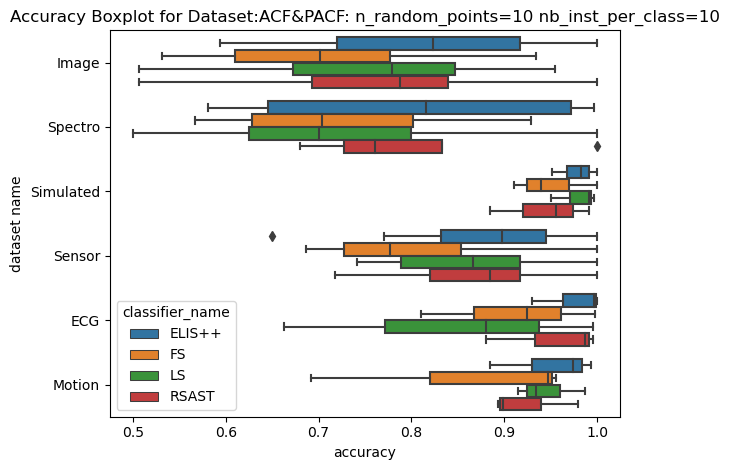

In [70]:
max_bx=max(acc_per_type.accuracy)
min_bx=min(acc_per_type.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy', hue ='classifier_name')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc_per_type/boxplot_acc_per_type.png')

In [61]:
stats = acc_per_type.groupby(['Type','classifier_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
stats=pd.DataFrame(stats)
print(stats.round(2))

                           mean  count   std  ci95_interval
Type      classifier_name                                  
ECG       ELIS++_AVRBC     0.98      3  0.04           0.04
          FS_AVRBC         0.91      3  0.09           0.11
          LS_AVRBC         0.85      3  0.17           0.19
          RSAST            0.95      3  0.06           0.07
Image     ELIS++_AVRBC     0.81     15  0.14           0.07
          FS_AVRBC         0.71     15  0.13           0.07
          LS_AVRBC         0.76     15  0.13           0.07
          RSAST            0.76     15  0.15           0.07
Motion    ELIS++_AVRBC     0.95      3  0.06           0.07
          FS_AVRBC         0.86      3  0.15           0.17
          LS_AVRBC         0.95      3  0.04           0.04
          RSAST            0.92      3  0.05           0.06
Sensor    ELIS++_AVRBC     0.87      7  0.12           0.09
          FS_AVRBC         0.80      7  0.11           0.08
          LS_AVRBC         0.86      7  

In [62]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['Type'], aggfunc='count')

In [63]:
t_score_by_method=score_by_method.transpose()
t_score_by_method
t_score_by_method[[hyperparameter]].round(2)/5


classifier_name,RSAST
Type,
ECG,3.0
Image,15.0
Motion,3.0
Sensor,7.0
Simulated,3.0
Spectro,4.0
